<a href="https://colab.research.google.com/github/henriquehorton/Python_aprendendo/blob/master/matplotlib/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/henriquehorton/Python_aprendendo/master/matplotlib/tabelas/monitoramento_tempo.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


In [4]:
df['data'] = pd.to_datetime(df['data'])
df2 = df.head(20)

#Grafico de linha com plot


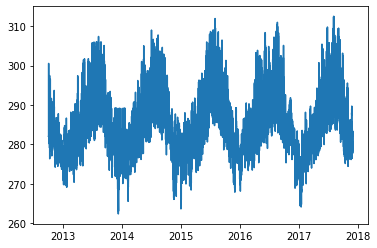

In [6]:
# Padrão
plt.plot(df['data'],df['temperatura'])

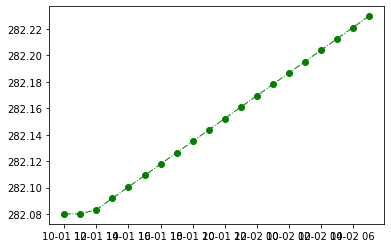

In [7]:
plt.plot(df2['data'],df2['temperatura'], color='green', lw=1 , ls='-.', marker='o')
# lw = epessura da linha
# ls = tipo de linha (pontilhada, pontos, linha)
# marker = marcador

* Configuração de eixo
* Adicionar titulos e legenda

Text(2017-08-04 00:00:00, 312.52, 'Máxima temperatura')

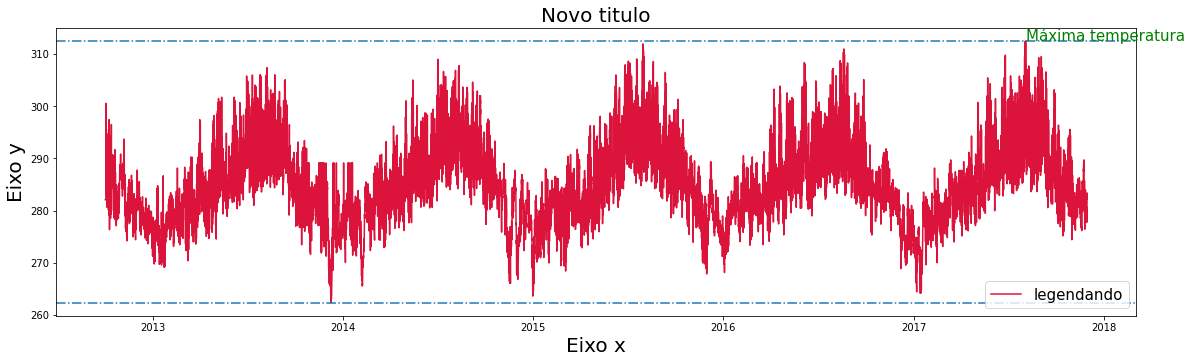

In [8]:
# Configuração de eixo
fig  = plt.figure(figsize=(15,4))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df['data'],df['temperatura'], color='crimson')
# LEGENDAS
eixo.set_title('Novo titulo',fontsize=20) # plt.title('Temperatua no tempo')
eixo.set_ylabel('Eixo y',fontsize=20) # plt.ylabel('Eixo y')
eixo.set_xlabel('Eixo x',fontsize=20) # plt.xlabel('Eixo x')
eixo.legend(['legendando'], loc='lower right', fontsize=15)

# valor min e max
eixo.axhline(max(df['temperatura']),ls='-.')
eixo.axhline(min(df['temperatura']),ls='-.')

# achar ponto xy max e min
x_max = df['data'][df['temperatura'].idxmax()]
y_max = max(df['temperatura'])

# criar anotação
eixo.annotate('Máxima temperatura',xy=(x_max,y_max), fontsize=15, color='g')

* aumentar fonte com fontsize
* limitar eixo com set_xlim(inicio,fim)

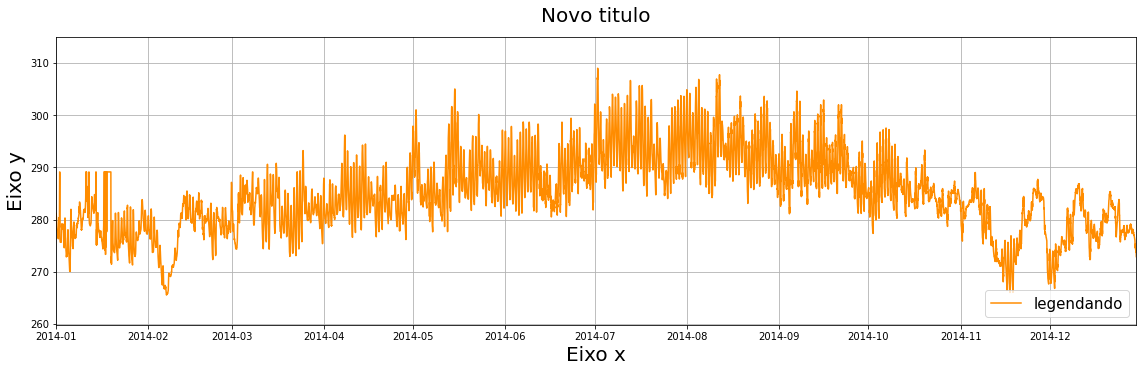

In [9]:
fig  = plt.figure(figsize=(15,4))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df['data'],df['temperatura'], color='darkorange')
# limitar eixo
eixo.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2014,12,30))
eixo.set_title('Novo titulo',fontsize=20, pad=15) # plt.title('Temperatua no tempo')
# pad afasta a legenda
eixo.set_ylabel('Eixo y',fontsize=20) # plt.ylabel('Eixo y')
eixo.set_xlabel('Eixo x',fontsize=20) # plt.xlabel('Eixo x')
eixo.legend(['legendando'], loc='lower right', fontsize=15)
# perfumaria
eixo.grid(True)


Trabalhando com dois eixos

In [10]:
df_esquerda = df.loc[df['data'] < datetime.datetime(2014,1,1)]
df_direita = df.loc[df['data'] > datetime.datetime(2014,12,31)]

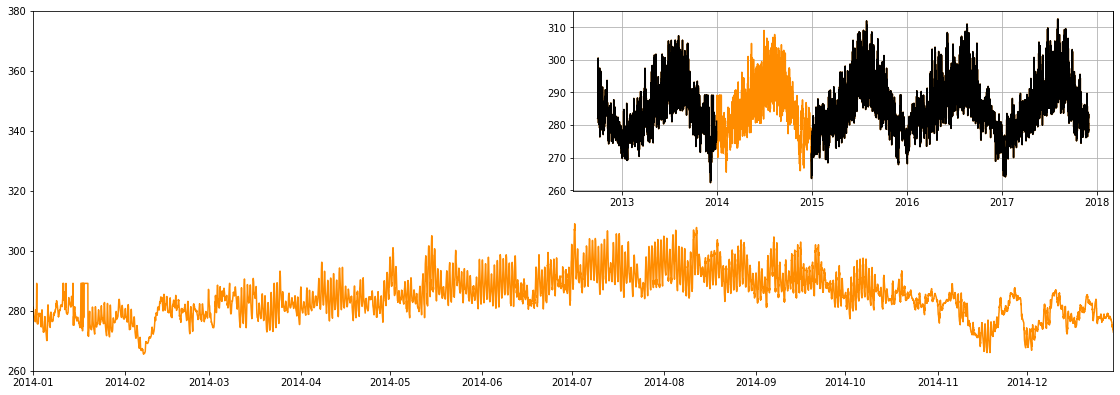

In [11]:
fig = plt.figure(figsize=(15,5))
eixo = fig.add_axes((0,0,1,1))
eixo2 = fig.add_axes((0.5,0.5,0.5,0.5))

eixo.plot(df['data'],df['temperatura'], color='darkorange')
eixo.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2014,12,30))
eixo.set_ylim(260,380)
eixo2.plot(df['data'],df['temperatura'], color='darkorange')
eixo2.plot(df_esquerda['data'],df_esquerda['temperatura'],color='k')
eixo2.plot(df_direita['data'],df_direita['temperatura'], color='k')
eixo2.grid()

# Grafico de Barras com bar

[Text(0, 0, 'Domingo'),
 Text(0, 0, 'Segunda'),
 Text(0, 0, 'Terça'),
 Text(0, 0, 'Quarta'),
 Text(0, 0, 'Quinta'),
 Text(0, 0, 'Sexta'),
 Text(0, 0, 'Sábado')]

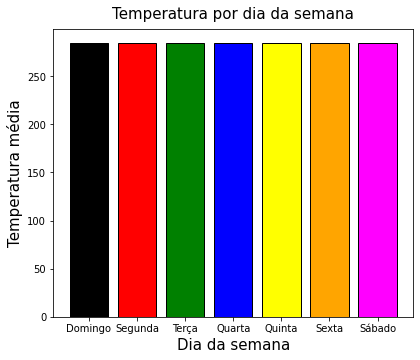

In [12]:
temperatura_por_dia_da_semana = df.groupby('dia_da_semana')['temperatura'].mean()
nome_dias = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
temperatura_por_dia_da_semana = temperatura_por_dia_da_semana[nome_dias]

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

indice = range(len(temperatura_por_dia_da_semana))
cores = ['black', 'r', 'g', 'b', 'yellow', 'orange', 'magenta']

eixo.bar(indice, temperatura_por_dia_da_semana, color=cores, edgecolor='black')
eixo.set_title('Temperatura por dia da semana', fontsize=15, pad=10)
eixo.set_xlabel('Dia da semana', fontsize=15)
eixo.set_ylabel('Temperatura média', fontsize=15)
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias)

#Grafico de pizza com pie

Text(0.5, 1.0, 'Temperatura por dia da semana')

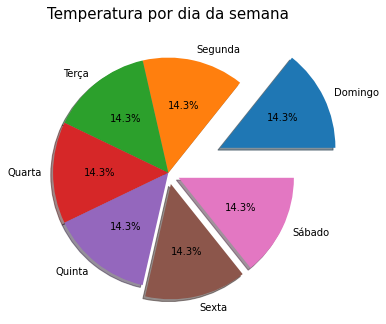

In [13]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

explodir = [0.5, 0, 0, 0, 0, 0.1, 0.1]

eixo.pie(temperatura_por_dia_da_semana, labels=temperatura_por_dia_da_semana.index,
         autopct='%.1f%%', explode=explodir, shadow=True)
eixo.set_title('Temperatura por dia da semana', fontsize=15, pad=10)